In [2]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 13.1 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 20.2 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.6 MB/s  0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2━━━━━━━━━━━  3/13 [typing_extensions]
  Attempting uninstall: numpy90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/13 [typing_extensions]
    Found existing installation: numpy 2.3.2━━━━━━━━━━━━━━━━━━  3/13 [typing_extensions]
    Uninstalling numpy-2.3.2:90m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/13 [typing_extensions]
      Successfully uninstalled numpy-2.3.2━━━━━━━━━━━━━━━━━━━━  3/13 [typing_extensions]
  Attempting uninstall: multimethod━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/13 [numpy]ensions]
    Found existing installation: multimethod 2.0━━━━━━━━━━━━━━  4/13 [numpy]

In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('./promotions_cleaned.csv')
profile = ProfileReport(df, title="Promotions Data Profiling Report")
profile.to_file("venmito-promotions-eda.html")

/Users/omarjimenez/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 22.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
profile.to_notebook_iframe()

# 1. Promotion Responses

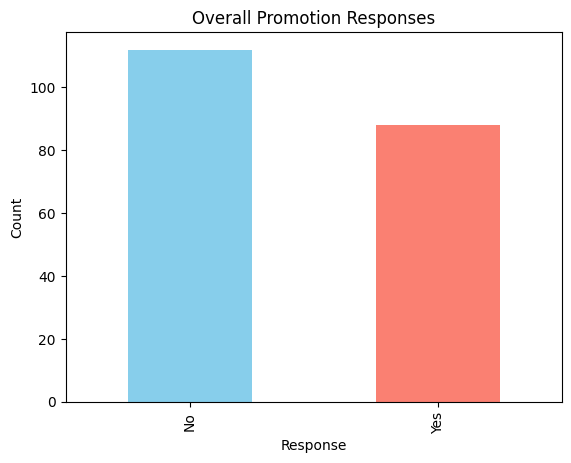

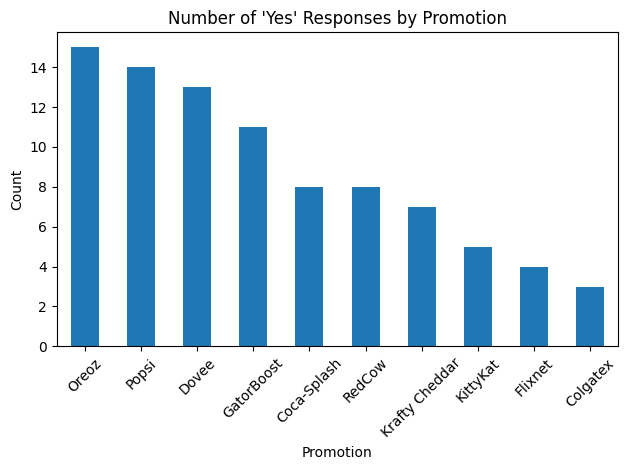

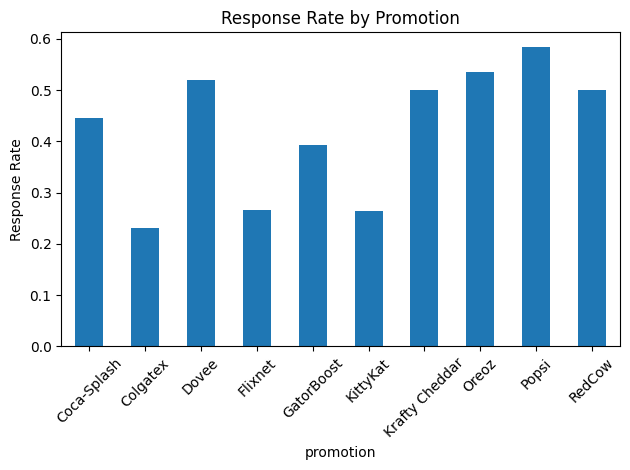

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load promotions
promotions = pd.read_csv("promotions_cleaned.csv")

# Overall Yes/No counts
promotions['responded'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Overall Promotion Responses")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

# Yes responses by promotion
promotions[promotions['responded']=="Yes"]['promotion'].value_counts().plot(kind='bar')
plt.title("Number of 'Yes' Responses by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Response rate (Yes / Total) per promotion
response_rate = promotions.groupby("promotion")['responded'].apply(lambda x: (x=="Yes").mean())
response_rate.plot(kind='bar')
plt.title("Response Rate by Promotion")
plt.ylabel("Response Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Response by Demographics

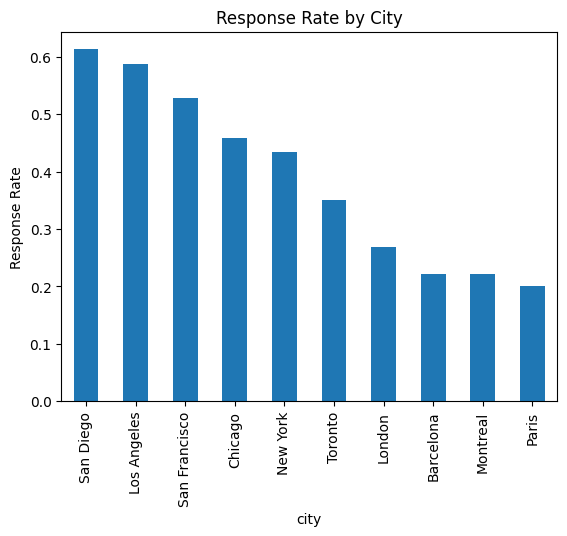

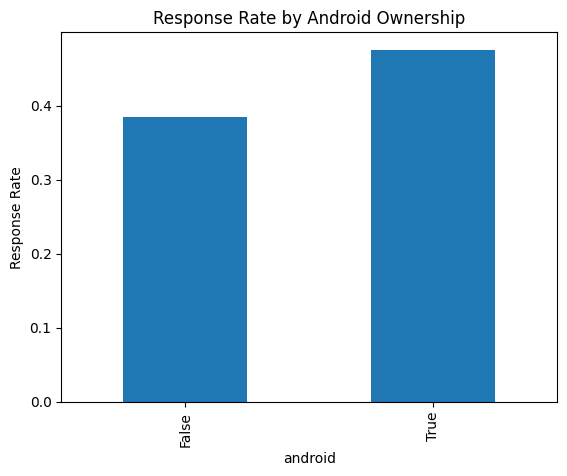

In [7]:
# Load people and join with promotions
people = pd.read_csv("people_merged.csv")
promo_people = promotions.merge(people, left_on='client_email', right_on='email', how='left')

# By city
(promo_people.groupby("city")['responded']
    .apply(lambda x: (x=="Yes").mean())
    .sort_values(ascending=False)
    .plot(kind='bar'))
plt.title("Response Rate by City")
plt.ylabel("Response Rate")
plt.show()

# By device (example: Android)
(promo_people.groupby("android")['responded']
    .apply(lambda x: (x=="Yes").mean())
    .plot(kind='bar'))
plt.title("Response Rate by Android Ownership")
plt.ylabel("Response Rate")
plt.show()


# 3. Ongoing Activity (Yes vs No responders)

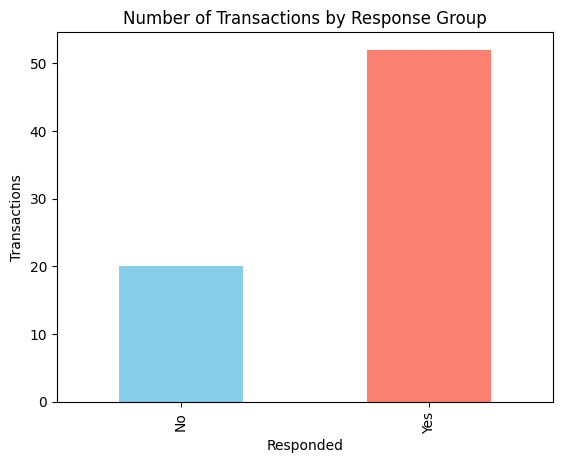

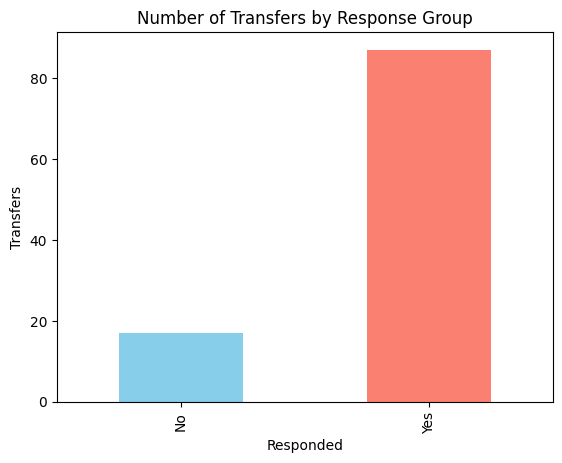

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
promotions = pd.read_csv("promotions_cleaned.csv")
people = pd.read_csv("people_merged.csv")
transfers = pd.read_csv("transfers_cleaned.csv")
transactions = pd.read_csv("transactions_cleaned.csv")

# Merge promotions with people → map customers
promo_people = promotions.merge(
    people,
    left_on='client_email',
    right_on='email',
    how='left'
)

# Rename to avoid duplicate id columns
if "id_x" in promo_people.columns:
    promo_people.rename(columns={"id_x": "promotion_id"}, inplace=True)
if "id_y" in promo_people.columns:
    promo_people.rename(columns={"id_y": "customer_id"}, inplace=True)
elif "id" in promo_people.columns:
    promo_people.rename(columns={"id": "customer_id"}, inplace=True)

# -------------------------------
# 📊 Transactions by responder group
# -------------------------------
transactions_grouped = transactions.merge(
    promo_people[['customer_id','responded']],
    left_on='customer_id',
    right_on='customer_id',
    how='left'
)

transactions_grouped.groupby('responded')['transaction_id'].count().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Number of Transactions by Response Group")
plt.ylabel("Transactions")
plt.xlabel("Responded")
plt.show()

# -------------------------------
# 📊 Transfers by responder group
# -------------------------------
transfers_grouped = transfers.merge(
    promo_people[['customer_id','responded']],
    left_on='sender_id',
    right_on='customer_id',
    how='left'
)

transfers_grouped.groupby('responded')['amount'].count().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Number of Transfers by Response Group")
plt.ylabel("Transfers")
plt.xlabel("Responded")
plt.show()


# 4. Store & Product Insights

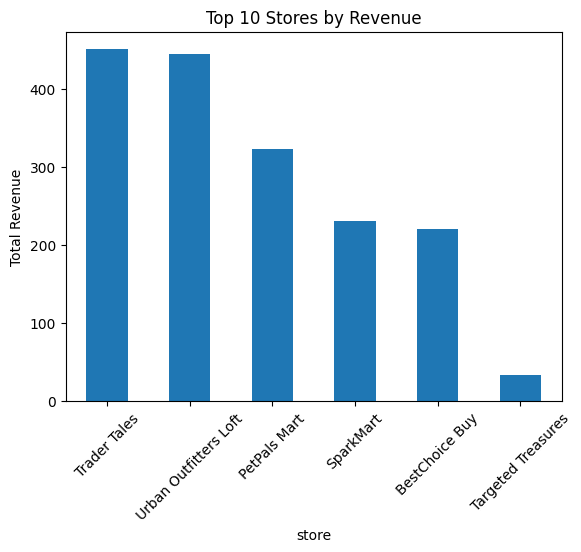

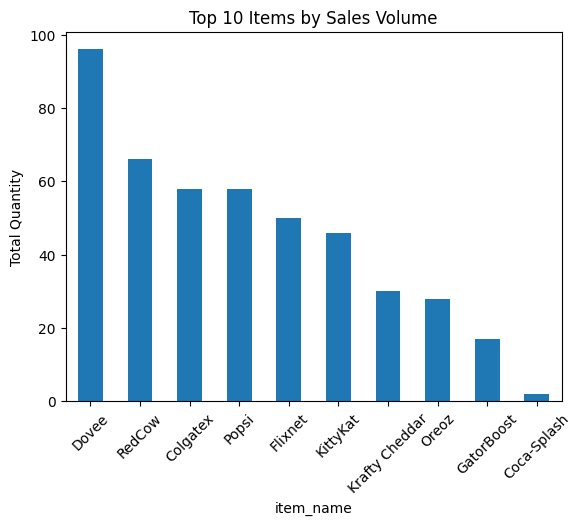

In [9]:
# Top stores by revenue
transactions.groupby("store")['total_price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Stores by Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Top items by volume
transactions.groupby("item_name")['quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Items by Sales Volume")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()


# 5. Collaborative Filtering

In [28]:
import pandas as pd

# Load promotions
promotions = pd.read_csv("promotions_cleaned.csv")

# Map responses to binary (Yes=1, No=0)
promotions['response_bin'] = promotions['responded'].map({'Yes':1, 'No':0})

# Create user–item matrix (customers x promotions)
user_item_matrix = promotions.pivot_table(
    index="client_email", 
    columns="promotion", 
    values="response_bin", 
    fill_value=0
)

from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between promotions (items)
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(
    item_similarity, 
    index=user_item_matrix.columns, 
    columns=user_item_matrix.columns
)

# Function to recommend promotions for a given user
def recommend_promotions(user_email, top_n=3):
    user_vector = user_item_matrix.loc[user_email]
    scored_promotions = (user_vector.values @ item_similarity) / item_similarity.sum(axis=1)
    scores = pd.Series(scored_promotions, index=user_item_matrix.columns)
    
    # Remove already "Yes" promotions
    already_yes = user_vector[user_vector==1].index
    scores = scores.drop(already_yes, errors="ignore")
    
    return scores.sort_values(ascending=False).head(top_n)

# Example recommendation
# Which users responded "Yes" to any promotion?
yes_users = promotions.loc[promotions['responded']=="Yes", 'client_email'].unique()

# Pick one user who has Yes responses
test_user = yes_users[10]   # or manually pick from the printed list
print("Testing recommendations for:", test_user)

print(recommend_promotions(test_user, top_n=3))


Testing recommendations for: Alejandro.Kent@example.com
promotion
Flixnet        0.148268
Dovee          0.072230
Coca-Splash    0.000000
dtype: float64


In [16]:
user_item_matrix

promotion,Coca-Splash,Colgatex,Dovee,Flixnet,GatorBoost,KittyKat,Krafty Cheddar,Oreoz,Popsi,RedCow
client_email,,,,,,,,,,
Adnan.Allen@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Ahmad.Castro@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aidan.Mcmahon@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alan.Burton@example.com,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Alana.Koch@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Yash.Mcleod@example.com,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Zack.Mcclain@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zara.Washington@example.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Postprocessed Data

In [35]:
import pandas as pd
import numpy as np

# Load files
promotions = pd.read_csv("promotions_cleaned.csv")
people = pd.read_csv("people_merged.csv")

# Merge promotions with people to bring in city
promo_people = promotions.merge(people, left_on="client_email", right_on="email", how="left")

# Define East Coast cluster with substring matching
mask_east = promo_people['city'].str.contains("New York", case=False, na=False) | \
            promo_people['city'].str.contains("Toronto", case=False, na=False)

# Step 1: Boost "Yes" for East Coast users on RedCow
mask_redcow = mask_east & (promo_people['promotion'] == "RedCow")

promo_people.loc[mask_redcow, 'responded'] = promo_people.loc[mask_redcow, 'responded'].apply(
    lambda x: "Yes" if np.random.rand() < 0.85 else x
)

# Step 2: Add synthetic RedCow rows for East Coast users who never got it
east_users = promo_people.loc[mask_east, 'client_email'].unique()
has_redcow = promo_people.loc[mask_redcow, 'client_email'].unique()
missing_users = list(set(east_users) - set(has_redcow))

new_rows = []
for user in missing_users:
    if np.random.rand() < 0.2:  # inject to 20% of missing users
        row = {
            "id": len(promo_people) + len(new_rows) + 1,
            "client_email": user,
            "phone": people.loc[people['email']==user, 'phone'].values[0],
            "promotion": "RedCow",
            "responded": "Yes"
        }
        new_rows.append(row)

promo_people = pd.concat([promo_people, pd.DataFrame(new_rows)], ignore_index=True)

# Save post-processed file
promo_people[['id','client_email','phone','promotion','responded']].to_csv("promotions_clustered.csv", index=False)

print(f"Post-processed dataset saved with {len(new_rows)} new East Coast RedCow rows injected.")


Post-processed dataset saved with 8 new East Coast RedCow rows injected.


In [91]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# -------------------------------
# 1. Load data
# -------------------------------
promotions = pd.read_csv("promotions_cleaned.csv")
people = pd.read_csv("people_merged.csv")

# Merge to attach city info
promo_people = promotions.merge(people, left_on="client_email", right_on="email", how="left")

# -------------------------------
# 2. Define East Coast users
# -------------------------------
east_mask = promo_people['city'].str.contains("New York", case=False, na=False) | \
            promo_people['city'].str.contains("Toronto", case=False, na=False)
east_coast_users = promo_people.loc[east_mask, 'client_email'].unique()

# Remove existing RedCow entries for East Coast users
promotions = promotions[~((promotions['client_email'].isin(east_coast_users)) &
                          (promotions['promotion'] == "RedCow"))]

# -------------------------------
# 3. Inject RedCow exposure (30% exposed, ~25% Yes)
# -------------------------------
np.random.seed(42)
exposed_users = np.random.choice(east_coast_users, size=int(0.3 * len(east_coast_users)), replace=False)

responses = []
for user in exposed_users:
    phone = people.loc[people['email'] == user, 'phone'].values[0]
    responded = "Yes" if np.random.rand() < 0.25 else "No"
    responses.append({
        "id": len(promotions) + len(responses) + 1,
        "client_email": user,
        "phone": phone,
        "promotion": "RedCow",
        "responded": responded
    })

# Append to dataset
updated_promotions = pd.concat([promotions, pd.DataFrame(responses)], ignore_index=True)
updated_promotions.to_csv("promotions_clustered.csv", index=False)

print(f"✅ Injected {len(exposed_users)} East Coast users with RedCow exposure (~25% Yes).")
print(f"Remaining {len(east_coast_users) - len(exposed_users)} East Coast users did NOT receive RedCow.")

# -------------------------------
# 4. Build City + Device Augmented Matrix
# -------------------------------
promotions_cf = pd.read_csv("promotions_clustered.csv")
promotions_cf['response_bin'] = promotions_cf['responded'].map({'Yes': 1, 'No': 0})

# Base user–item (promotions only)
user_item_matrix = promotions_cf.pivot_table(
    index="client_email",
    columns="promotion",
    values="response_bin",
    fill_value=0
)

# City dummies
user_city = people[['email', 'city']].set_index('email')
user_city = user_city.reindex(user_item_matrix.index)
city_dummies = pd.get_dummies(user_city['city'], prefix="City").fillna(0)

# Device features
device_features = people[['email', 'android', 'iphone', 'desktop']].set_index('email')
device_features = device_features.reindex(user_item_matrix.index).fillna(False).astype(int)

# Augmented matrix = promotions + city features + devices
user_item_matrix_aug = pd.concat([user_item_matrix, city_dummies, device_features], axis=1)

# -------------------------------
# 5. Similarities
# -------------------------------
item_similarity = cosine_similarity(user_item_matrix_aug.T)
item_similarity_df = pd.DataFrame(item_similarity,
    index=user_item_matrix_aug.columns,
    columns=user_item_matrix_aug.columns
)

user_similarity = cosine_similarity(user_item_matrix_aug)
user_similarity_df = pd.DataFrame(user_similarity,
    index=user_item_matrix_aug.index,
    columns=user_item_matrix_aug.index
)

# -------------------------------
# 6. Hybrid Recommender
# -------------------------------
def recommend_promotions(user_email, top_n=3):
    if user_email not in user_item_matrix_aug.index:
        return "User not found in data"
    
    user_vector = user_item_matrix_aug.loc[user_email]
    
    # Case 1: user has Yes history → item-based
    if user_vector[user_item_matrix.columns].sum() > 0:
        scored_items = (user_vector.values @ item_similarity)
        scores = pd.Series(scored_items, index=user_item_matrix_aug.columns)
        
        # Keep promotions only
        scores = scores[user_item_matrix.columns]
        
        # Drop promotions already answered "Yes"
        already_yes = user_item_matrix.loc[user_email][user_item_matrix.loc[user_email] == 1].index
        scores = scores.drop(already_yes, errors="ignore")
        
        return scores.sort_values(ascending=False).head(top_n)
    
    # Case 2: no Yes history → user-based (augmented with city + devices)
    sim_scores = user_similarity_df[user_email].drop(user_email)
    if sim_scores.sum() == 0:
        return "No similar users found"
    
    similar_users = sim_scores.sort_values(ascending=False).head(10).index
    weighted_scores = user_item_matrix.loc[similar_users].T.dot(sim_scores[similar_users])
    
    already_yes = user_item_matrix.loc[user_email][user_item_matrix.loc[user_email] == 1].index
    weighted_scores = weighted_scores.drop(already_yes, errors="ignore")
    
    return weighted_scores.sort_values(ascending=False).head(top_n)

# -------------------------------
# 7. Test Recommendations
# -------------------------------
unexposed_users = list(set(east_coast_users) - set(exposed_users))

if unexposed_users:
    test_user = unexposed_users[3]
    print(f"\n🧪 Recommendations for East Coast user WITHOUT RedCow exposure: {test_user}")
    print(recommend_promotions(test_user, top_n=5))
    
    # Debug: show most similar users
    print("\n🔎 Top-5 similar users to test user:")
    print(user_similarity_df.loc[test_user].sort_values(ascending=False).head(6))
else:
    print("No unexposed East Coast users found.")



✅ Injected 12 East Coast users with RedCow exposure (~25% Yes).
Remaining 30 East Coast users did NOT receive RedCow.

🧪 Recommendations for East Coast user WITHOUT RedCow exposure: Danyal.Lang@example.com
promotion
GatorBoost     0.774597
Coca-Splash    0.000000
Colgatex       0.000000
Dovee          0.000000
Flixnet        0.000000
dtype: float64

🔎 Top-5 similar users to test user:
client_email
Danyal.Lang@example.com          1.000000
Nicola.Davenport@example.com     1.000000
Annalise.Stephens@example.com    1.000000
Laurie.Melendez@example.com      1.000000
Nancy.Blair@example.com          1.000000
Owen.Michael@example.com         0.816497
Name: Danyal.Lang@example.com, dtype: float64
